# 7호선 요일별 승하차 패턴분석

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Gulim'
plt.rcParams['axes.unicode_minus'] = False 

In [4]:
df = pd.read_csv('./data/CARD_SUBWAY_MONTH_202505 (1).csv', index_col= False)
df

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20250501,분당선,야탑,17571,18765,20250504
1,20250501,8호선,석촌,6970,8042,20250504
2,20250501,분당선,서현,16548,17173,20250504
3,20250501,경부선,독산,8851,8507,20250504
4,20250501,경부선,수원,35103,38426,20250504
...,...,...,...,...,...,...
19134,20250531,과천선,선바위,6421,5197,20250603
19135,20250531,공항철도 1호선,영종,4658,5004,20250603
19136,20250531,공항철도 1호선,인천공항2터미널,10249,7316,20250603
19137,20250531,공항철도 1호선,인천공항1터미널,16395,15278,20250603


In [10]:
print(df.head())
print(df.describe())
print(df.isnull().sum())

        사용일자  노선명  역명  승차총승객수  하차총승객수        요일
0 2025-05-01  분당선  야탑   17571   18765  Thursday
1 2025-05-01  8호선  석촌    6970    8042  Thursday
2 2025-05-01  분당선  서현   16548   17173  Thursday
3 2025-05-01  경부선  독산    8851    8507  Thursday
4 2025-05-01  경부선  수원   35103   38426  Thursday
                                사용일자         승차총승객수         하차총승객수
count                          19139   19139.000000   19139.000000
mean   2025-05-16 00:04:35.374889216   11581.145671   11530.513768
min              2025-05-01 00:00:00       1.000000       0.000000
25%              2025-05-08 00:00:00    4108.000000    3985.500000
50%              2025-05-16 00:00:00    8256.000000    7975.000000
75%              2025-05-24 00:00:00   15283.000000   15157.500000
max              2025-05-31 00:00:00  102915.000000  105169.000000
std                              NaN   11518.917971   11697.968781
사용일자      0
노선명       0
역명        0
승차총승객수    0
하차총승객수    0
요일        0
dtype: int64


## 데이터 전처리

In [ ]:
df['사용일자'] = df['사용일자'].astype(str)
df['사용일자'] = pd.to_datetime(df['사용일자'], errors='coerce')    # 사용일자 타입 변환
df

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,2025-05-01,분당선,야탑,17571,18765,20250504
1,2025-05-01,8호선,석촌,6970,8042,20250504
2,2025-05-01,분당선,서현,16548,17173,20250504
3,2025-05-01,경부선,독산,8851,8507,20250504
4,2025-05-01,경부선,수원,35103,38426,20250504
...,...,...,...,...,...,...
19134,2025-05-31,과천선,선바위,6421,5197,20250603
19135,2025-05-31,공항철도 1호선,영종,4658,5004,20250603
19136,2025-05-31,공항철도 1호선,인천공항2터미널,10249,7316,20250603
19137,2025-05-31,공항철도 1호선,인천공항1터미널,16395,15278,20250603


In [ ]:
df['요일'] = df['사용일자'].dt.day_name()   # 요일 컬럼 생성
df

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,요일
0,2025-05-01,분당선,야탑,17571,18765,20250504,Thursday
1,2025-05-01,8호선,석촌,6970,8042,20250504,Thursday
2,2025-05-01,분당선,서현,16548,17173,20250504,Thursday
3,2025-05-01,경부선,독산,8851,8507,20250504,Thursday
4,2025-05-01,경부선,수원,35103,38426,20250504,Thursday
...,...,...,...,...,...,...,...
19134,2025-05-31,과천선,선바위,6421,5197,20250603,Saturday
19135,2025-05-31,공항철도 1호선,영종,4658,5004,20250603,Saturday
19136,2025-05-31,공항철도 1호선,인천공항2터미널,10249,7316,20250603,Saturday
19137,2025-05-31,공항철도 1호선,인천공항1터미널,16395,15278,20250603,Saturday


In [7]:
df.drop('등록일자', axis=1, inplace=True) # 불필요 데이터 제거
df

,사용일자,노선명,역명,승차총승객수,하차총승객수,요일
0,2025-05-01,분당선,야탑,17571,18765,Thursday
1,2025-05-01,8호선,석촌,6970,8042,Thursday
2,2025-05-01,분당선,서현,16548,17173,Thursday
3,2025-05-01,경부선,독산,8851,8507,Thursday
4,2025-05-01,경부선,수원,35103,38426,Thursday
...,...,...,...,...,...,...
19134,2025-05-31,과천선,선바위,6421,5197,Saturday
19135,2025-05-31,공항철도 1호선,영종,4658,5004,Saturday
19136,2025-05-31,공항철도 1호선,인천공항2터미널,10249,7316,Saturday
19137,2025-05-31,공항철도 1호선,인천공항1터미널,16395,15278,Saturday


In [ ]:
line_7_df = df[df['노선명'] == '7호선'].copy()  #7호선 데이터 필터링

In [20]:
print("7호선 데이터 상위 5행:")
print(line_7_df.head())
print(f"\n7호선 데이터 총 행 수: {len(line_7_df)} 행")
print("\n7호선 데이터 정보:")
line_7_df.info()

7호선 데이터 상위 5행:
          사용일자  노선명   역명  승차총승객수  하차총승객수        요일
339 2025-05-01  7호선   장암    1628     983  Thursday
340 2025-05-01  7호선  도봉산    5776    7022  Thursday
341 2025-05-01  7호선  수락산    9117    8727  Thursday
342 2025-05-01  7호선   마들    9875    9232  Thursday
343 2025-05-01  7호선   노원   16863   17483  Thursday

7호선 데이터 총 행 수: 1303 행

7호선 데이터 정보:
<class 'pandas.core.frame.DataFrame'>
Index: 1303 entries, 339 to 18924
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   사용일자    1303 non-null   datetime64[ns]
 1   노선명     1303 non-null   object        
 2   역명      1303 non-null   object        
 3   승차총승객수  1303 non-null   int64         
 4   하차총승객수  1303 non-null   int64         
 5   요일      1303 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 71.3+ KB


# 승하차 패턴 분석

In [26]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
line_7_df['요일'] = pd.Categorical(line_7_df['요일'], categories=weekday_order, ordered=True)
line_7_daily_total = line_7_df.groupby('요일', observed=False)[['승차총승객수', '하차총승객수']].sum().reset_index()
print("\n7호선 요일별 총 승하차객수:")
print(line_7_daily_total)


7호선 요일별 총 승하차객수:
          요일   승차총승객수   하차총승객수
0     Monday  2402801  2374506
1    Tuesday  2454839  2428169
2  Wednesday  2817457  2794636
3   Thursday  3202852  3164562
4     Friday  3444130  3378407
5   Saturday  2297391  2202811
6     Sunday  1481458  1441585


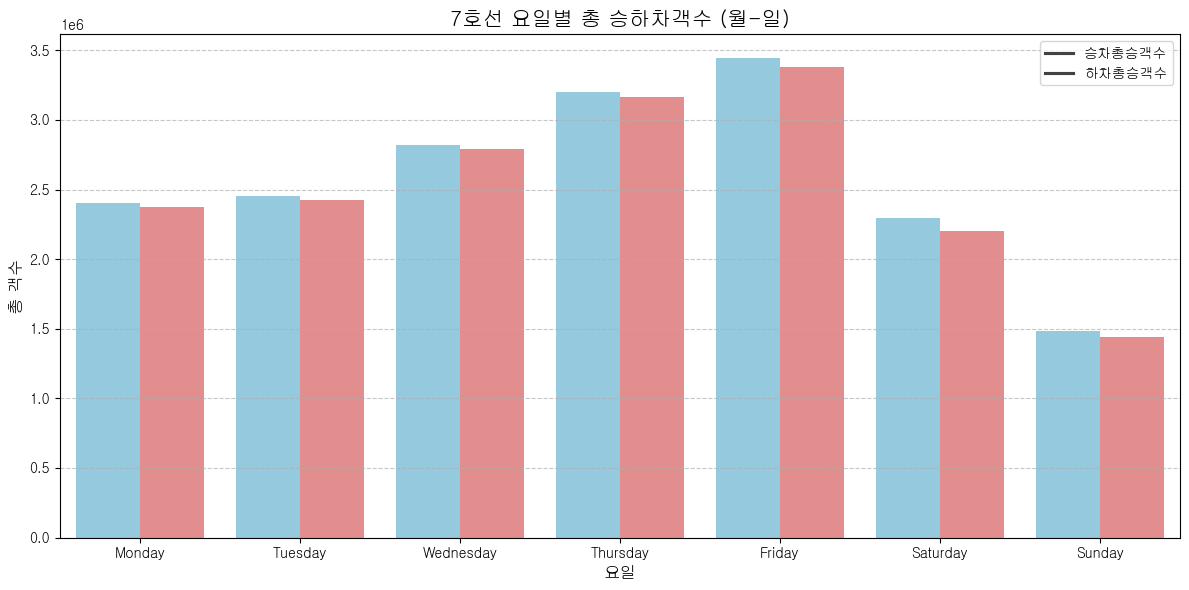

In [32]:
line_7_melted = pd.melt(line_7_daily_total, 
                        id_vars=['요일'], 
                        value_vars=['승차총승객수', '하차총승객수'], 
                        var_name='구분', 
                        value_name='총 객수')


plt.figure(figsize=(12, 6))
sns.barplot(x='요일', 
            y='총 객수', 
            hue='구분', 
            data=line_7_melted,
            palette={'승차총승객수': 'skyblue', '하차총승객수': 'lightcoral'}) 


plt.legend(title='', labels=['승차총승객수', '하차총승객수'])


plt.title('7호선 요일별 총 승하차객수 (월-일)', fontsize=15)
plt.xlabel('요일', fontsize=12)
plt.ylabel('총 객수', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [34]:
line_7_daily_avg = line_7_df.groupby('요일', observed=False)[['승차총승객수', '하차총승객수']].mean().reset_index()
print("\n7호선 요일별 평균 승하차객수:")
print(line_7_daily_avg)


7호선 요일별 평균 승하차객수:
          요일        승차총승객수        하차총승객수
0     Monday  14302.386905  14133.964286
1    Tuesday  14612.136905  14453.386905
2  Wednesday  16770.577381  16634.738095
3   Thursday  15251.676190  15069.342857
4     Friday  16400.619048  16087.652381
5   Saturday  10888.109005  10439.862559
6     Sunday   8818.202381   8580.863095


In [35]:
line_7_daily_total['승하차_비율'] = line_7_daily_total['하차총승객수'] / line_7_daily_total['승차총승객수']
line_7_daily_total['승하차_비율'].replace([np.inf, -np.inf], np.nan, inplace=True)
line_7_daily_total['승하차_비율'].fillna(0, inplace=True) # 승차객 0일 때 비율 0으로 처리
print("\n7호선 요일별 승하차 비율:")
print(line_7_daily_total[['요일', '승하차_비율']])


7호선 요일별 승하차 비율:
          요일    승하차_비율
0     Monday  0.988224
1    Tuesday  0.989136
2  Wednesday  0.991900
3   Thursday  0.988045
4     Friday  0.980917
5   Saturday  0.958832
6     Sunday  0.973085


C:\Users\Admin\AppData\Local\Temp\ipykernel_14832\75458494.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  line_7_daily_total['승하차_비율'].replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14832\75458494.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

In [37]:
line_7_station_daily_pattern = line_7_df.groupby(['역명', '요일'], observed=False)[['승차총승객수', '하차총승객수']].sum().reset_index()
line_7_station_daily_pattern['승하차_비율'] = line_7_station_daily_pattern['하차총승객수'] / line_7_station_daily_pattern['승차총승객수']
line_7_station_daily_pattern['승하차_비율'].replace([np.inf, -np.inf], np.nan, inplace=True)
line_7_station_daily_pattern['승하차_비율'].fillna(0, inplace=True)
print("\n7호선 역별 요일별 총 승하차객수 (일부):")
print(line_7_station_daily_pattern.head())


7호선 역별 요일별 총 승하차객수 (일부):
        역명         요일  승차총승객수  하차총승객수    승하차_비율
0  가산디지털단지     Monday  170095  170136  1.000241
1  가산디지털단지    Tuesday  170456  171619  1.006823
2  가산디지털단지  Wednesday  210194  211629  1.006827
3  가산디지털단지   Thursday  222890  225041  1.009651
4  가산디지털단지     Friday  243069  242020  0.995684


C:\Users\Admin\AppData\Local\Temp\ipykernel_14832\2455956655.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  line_7_station_daily_pattern['승하차_비율'].replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14832\2455956655.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

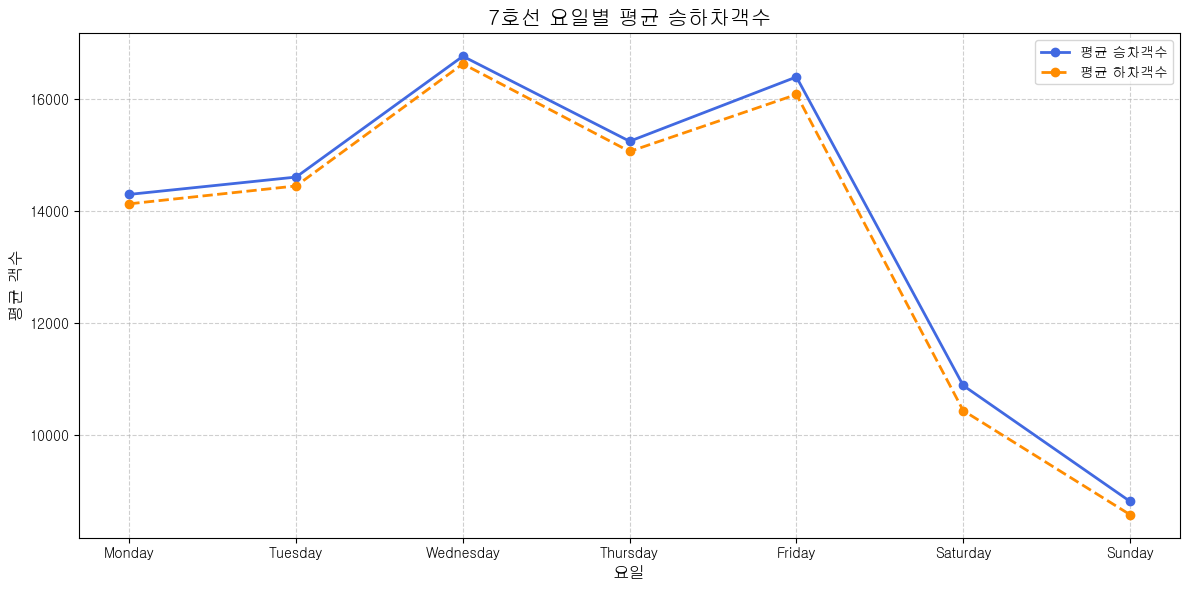

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(line_7_daily_avg['요일'], line_7_daily_avg['승차총승객수'], marker='o', label='평균 승차객수', color='royalblue', linewidth=2)
plt.plot(line_7_daily_avg['요일'], line_7_daily_avg['하차총승객수'], marker='o', label='평균 하차객수', color='darkorange', linestyle='--', linewidth=2)
plt.title('7호선 요일별 평균 승하차객수', fontsize=15)
plt.xlabel('요일', fontsize=12)
plt.ylabel('평균 객수', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_14832\1256127110.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  line_7_station_pivot_in = line_7_station_daily_pattern.pivot_table(index='역명', columns='요일', values='승차총승객수')


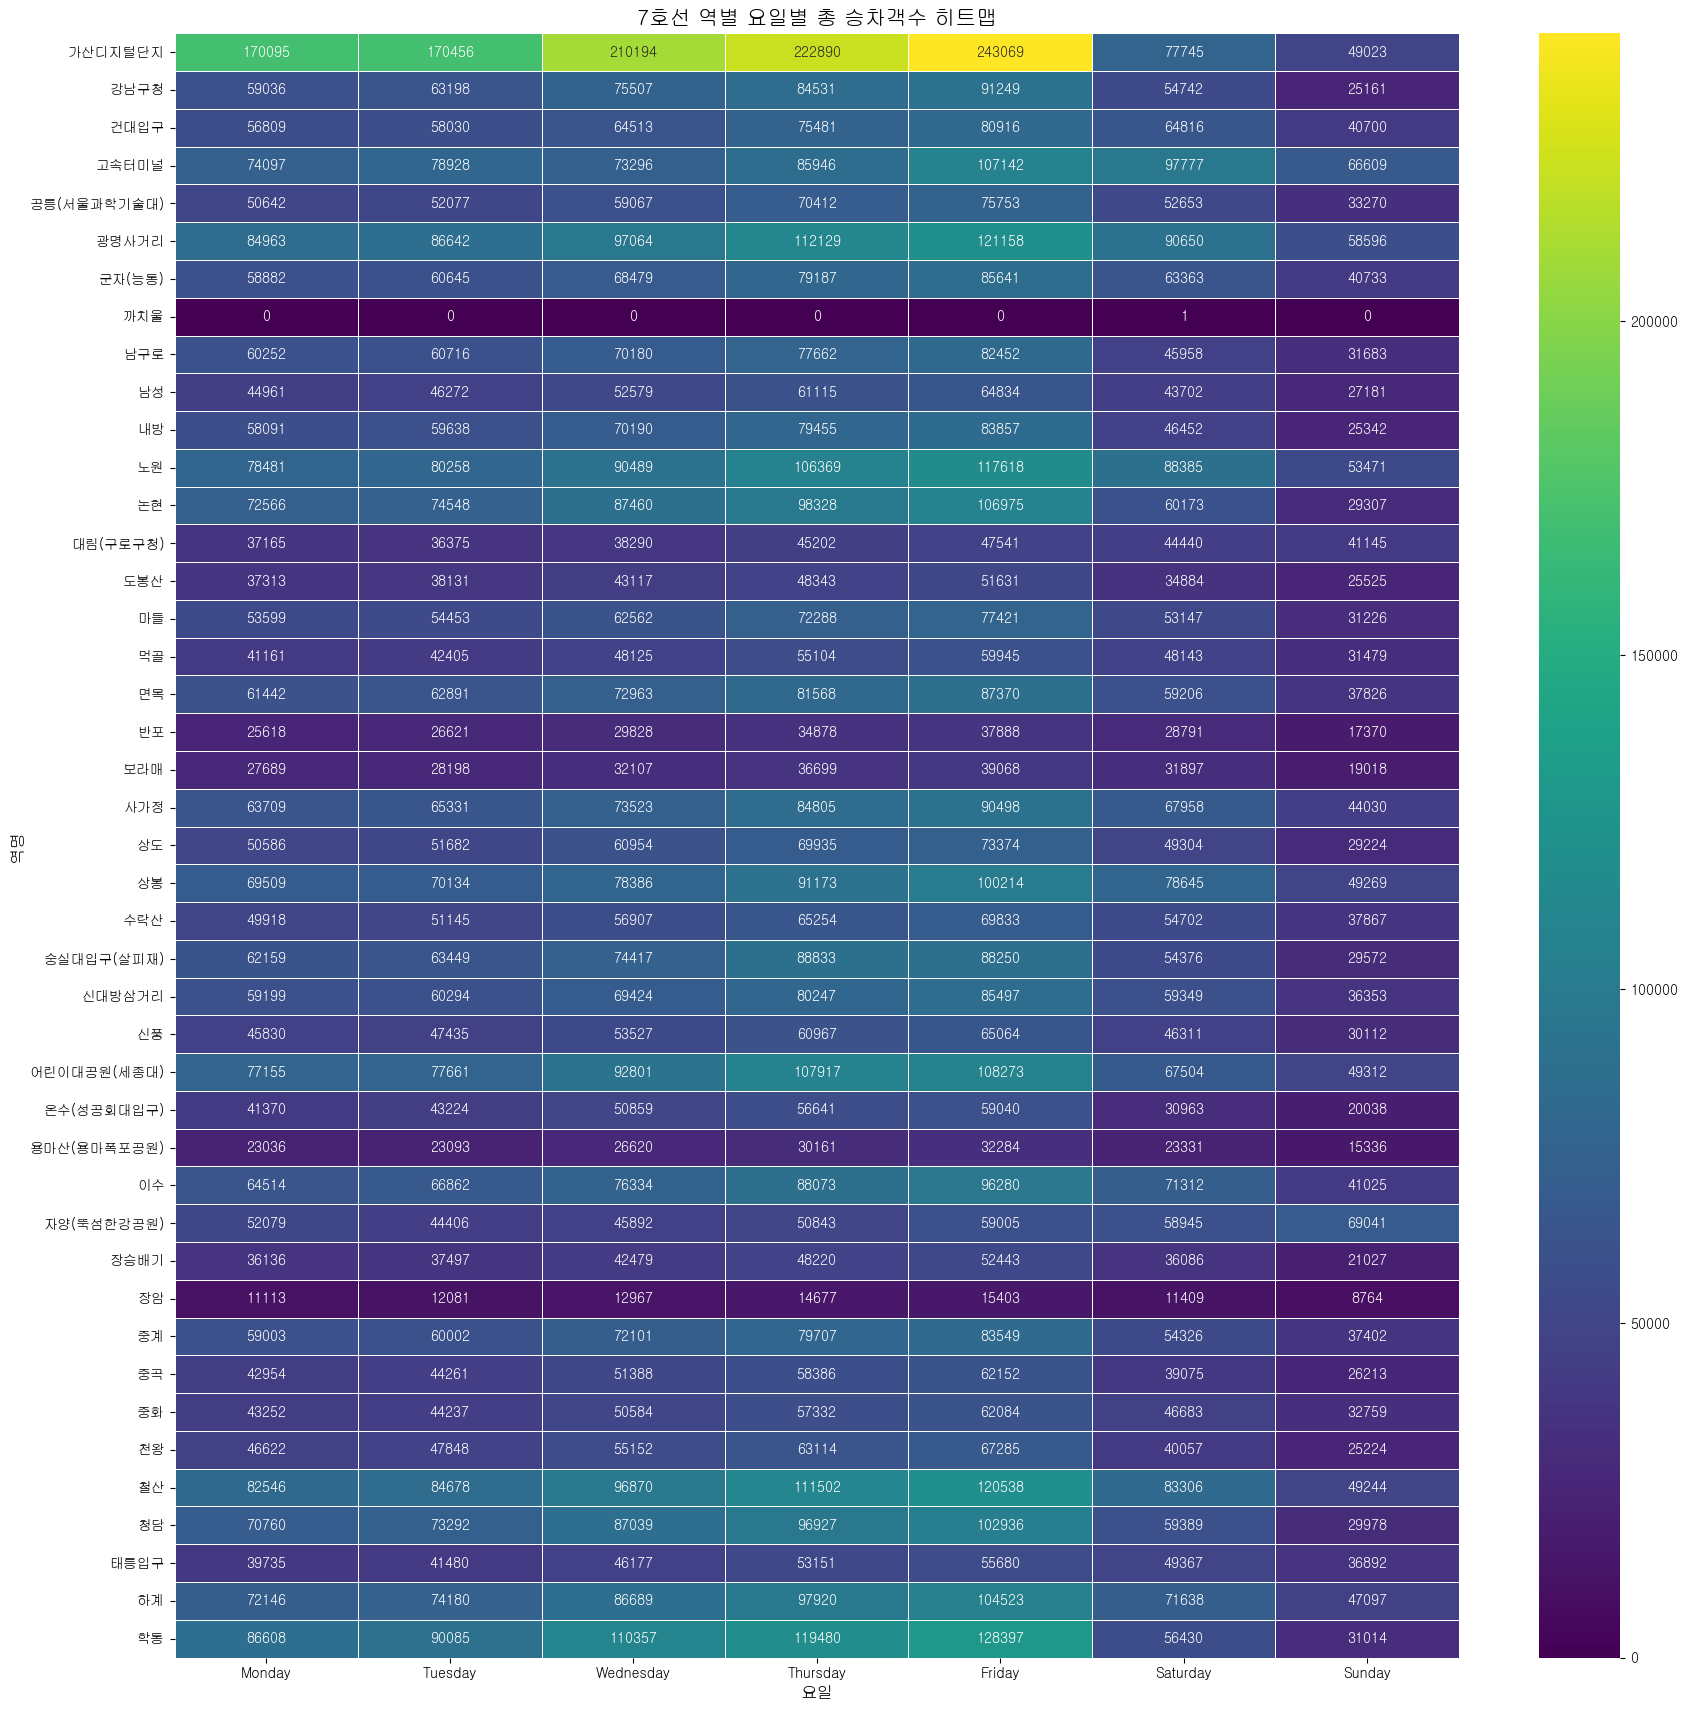

In [41]:
# 7호선 역별 요일별 승차 데이터 피봇
line_7_station_pivot_in = line_7_station_daily_pattern.pivot_table(index='역명', columns='요일', values='승차총승객수')
line_7_station_pivot_in = line_7_station_pivot_in[weekday_order] # 요일 순서 정렬

plt.figure(figsize=(18, max(8, len(line_7_station_pivot_in) * 0.4))) # 역 수에 따라 높이 조절
sns.heatmap(line_7_station_pivot_in, cmap='viridis', annot=True, fmt=".0f", linewidths=.5, linecolor='white')
plt.title('7호선 역별 요일별 총 승차객수 히트맵', fontsize=15)
plt.xlabel('요일', fontsize=12)
plt.ylabel('역명', fontsize=12)
plt.tight_layout()
plt.show()